In [1]:
#hide code
#from https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import glob
from itertools import cycle

from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons

In [3]:
data_dfs={}
for file in glob.glob("Processed Data/*.csv"):
    df=pd.read_csv(file)
    df['Month of Period End']=pd.to_datetime(df['Month of Period End'])
    data_dfs[file[file.find("(")+1:file.find(")")]]=df
    

In [4]:
data_dfs=dict(sorted(data_dfs.items(), key=lambda item: item[0]))

In [5]:
def draw_a_data(ax,X,Y,label,color,ylabel,linestyle,
                    add_text="",
                   scale=1,
                   percent=False):
    if percent:
        Y=(Y/Y.iloc[0]-1)*100
    Y=Y*scale
    ax.plot(X,Y,linestyle,label=label,color=color)
    ax.set_ylabel(ylabel+f" ({add_text})")
    
    
def draw(ax,fig,data_dfs,lines_info,data_to_plot,data_info):
        ax.cla()
        for key in lines_info.keys():
            data_df=data_dfs[key]
            lines=lines_info[key]
            for region in lines.keys():
                if lines[region]['show']:
                    data=data_df[data_df.Region==region]
                    X=data["Month of Period End"]
                    Y=data[data_to_plot]
                    draw_a_data(ax,X,Y,f"{region} ({key})",lines[region]['color'],
                                data_to_plot, lines[region]['linestyle'],
                            **data_info)
        ax.legend()
        fig.canvas.draw_idle()

In [6]:
cmap = matplotlib.cm.get_cmap('brg')

lines_info={}

linestyles = cycle(["-","--",":","-."])
for key in data_dfs.keys():
    lines_info[key]={}
    linestyle=next(linestyles)
    data_df=data_dfs[key]
    for i,region in enumerate(sorted(list(np.unique(data_df.Region)))):
        lines_info[key][region]={"show":False,
                                             "color":cmap(i/len(list(np.unique(data_df.Region)))),
                                             "linestyle":linestyle}
lines_info['ALL']['National']['show']=True

data_info={'Median Sale Price':{"add_text":"%",
                                "percent":True},
 'Homes Sold':{"add_text":"%",
                "percent":True},
 'New Listings':{"add_text":"%",
                "percent":True},
 'Inventory':{"add_text":"%",
                "percent":True},
 'Days on Market':{},
 'Average Sale To List':{"add_text":"%",
                                "scale":10**2}}

data_to_plot=list(data_info.keys())[0]

<IPython.core.display.Javascript object>


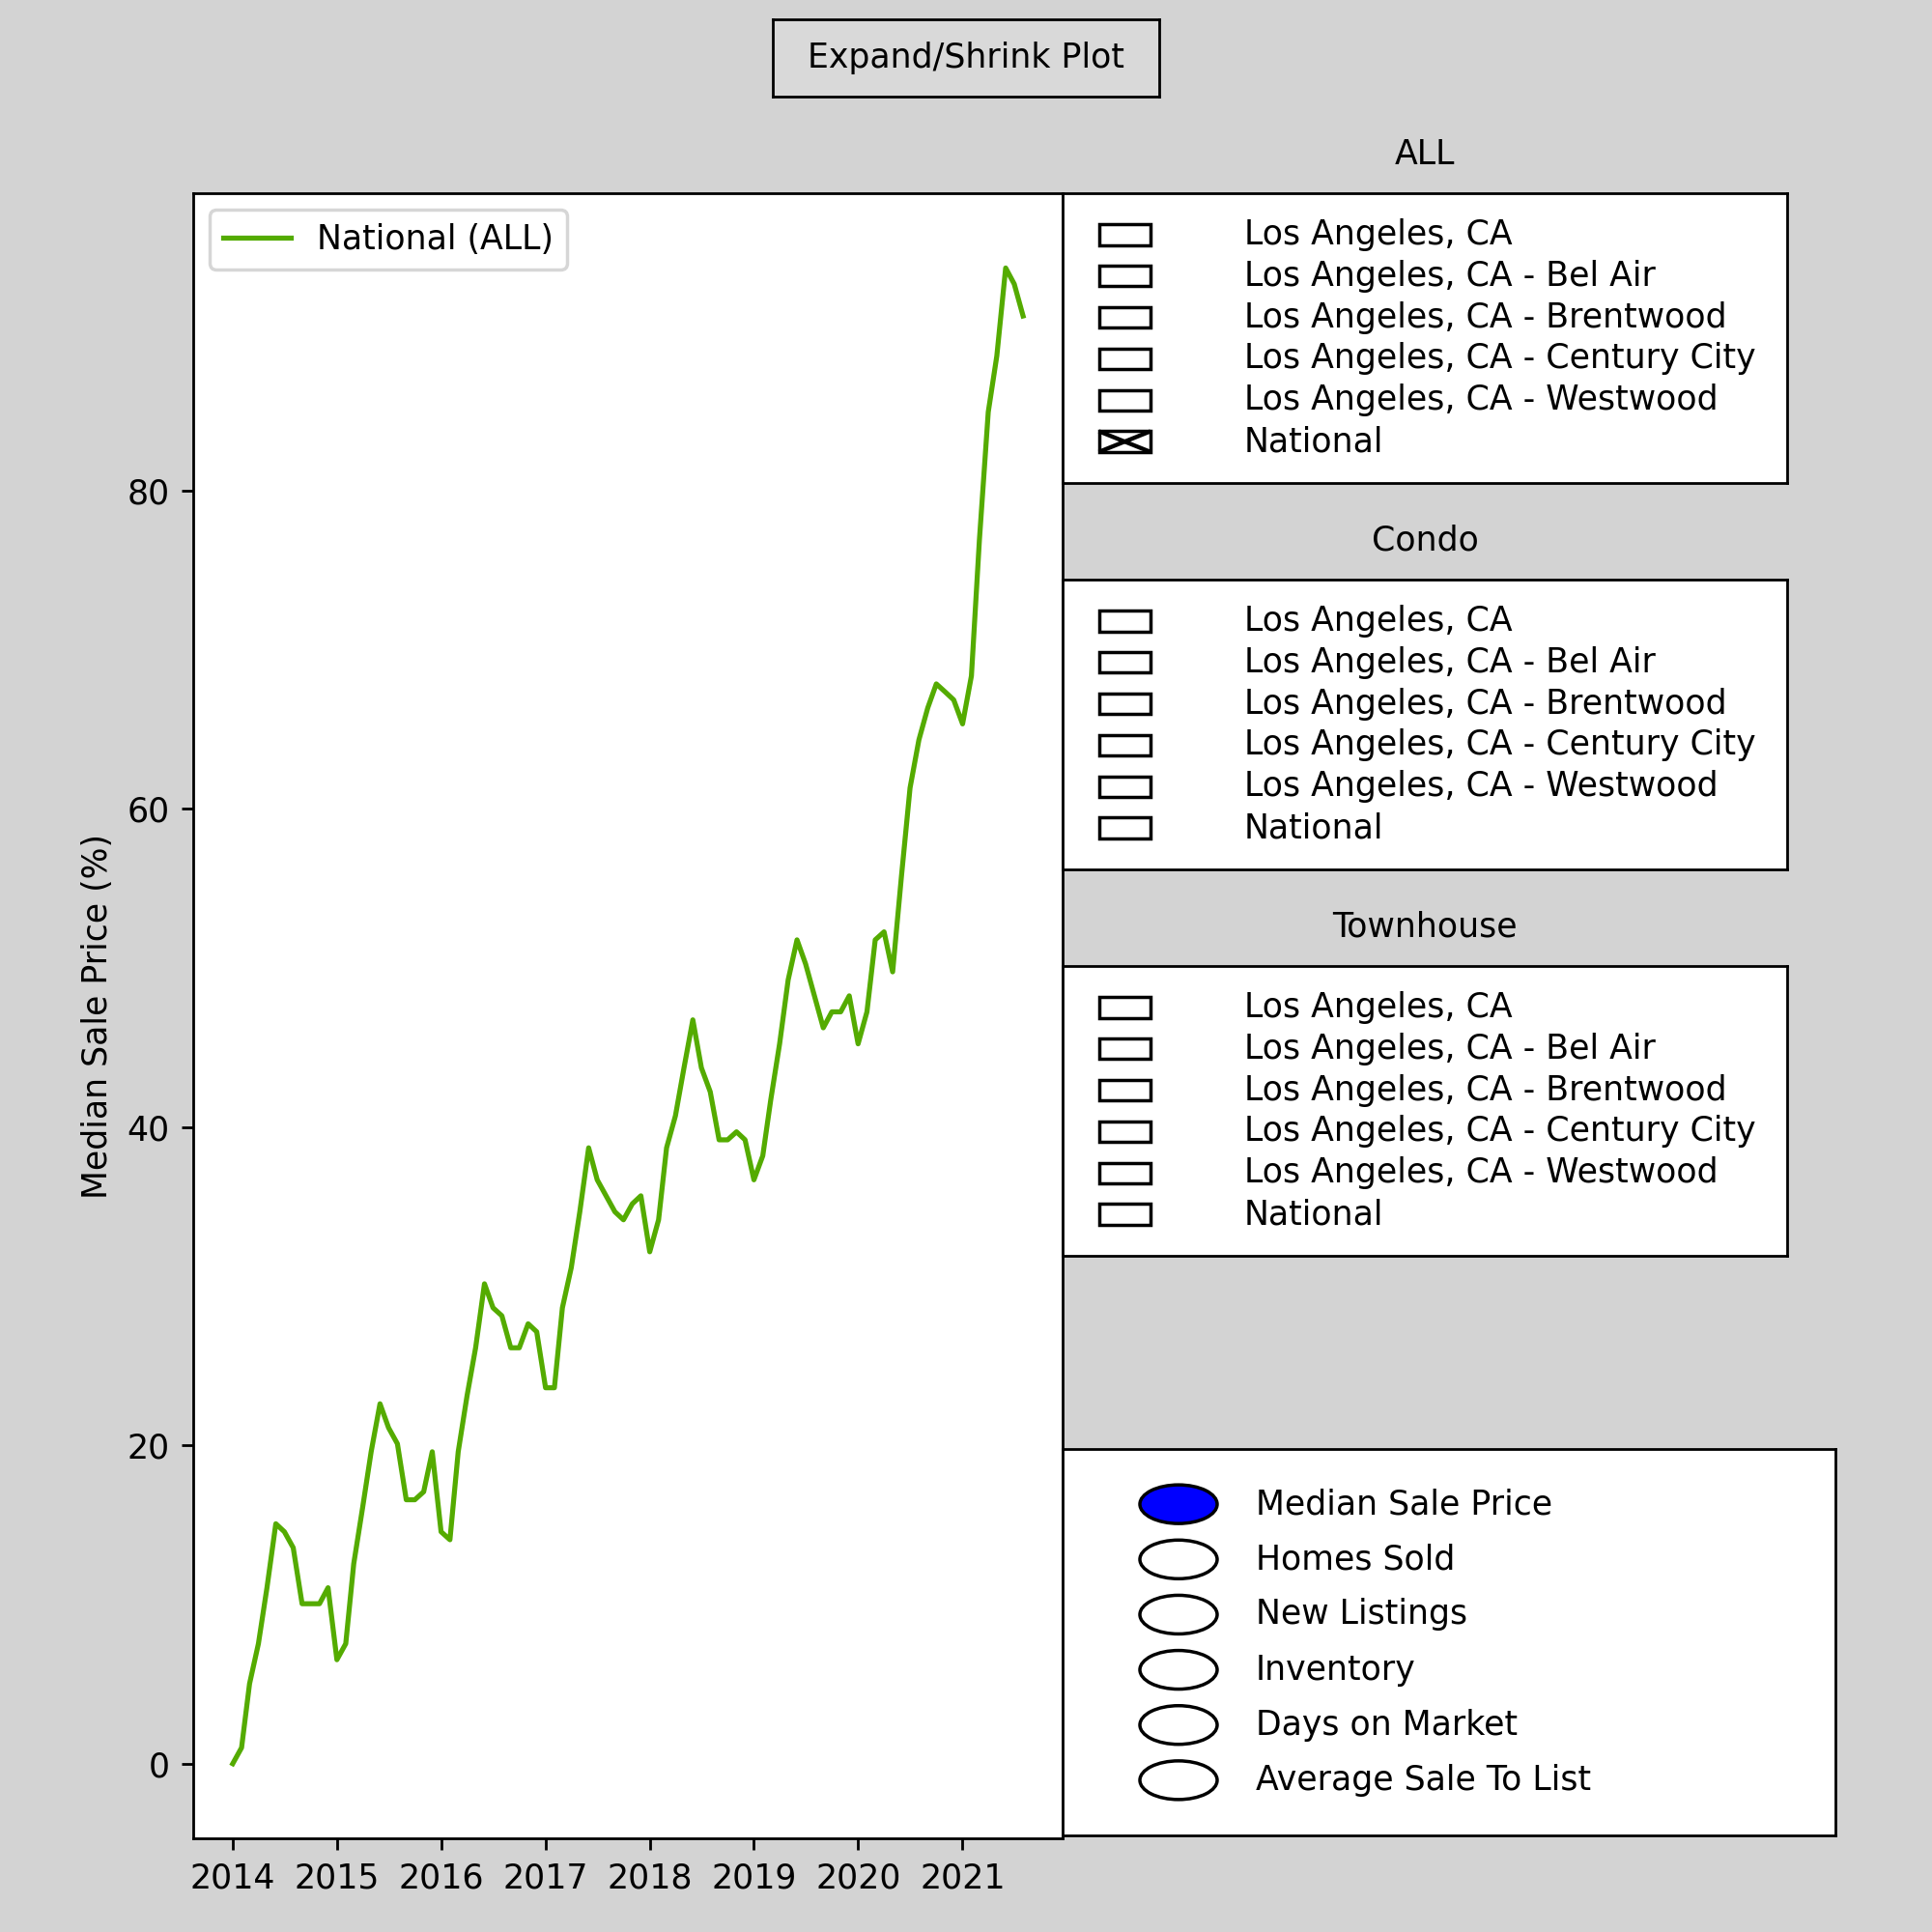

0

In [7]:

fig, ax = plt.subplots(figsize=(8,8),facecolor="lightgrey")
fig.tight_layout()
plt.subplots_adjust(right=0.55,left=0.1,top=0.9)
draw(ax,fig,data_dfs,lines_info,data_to_plot,data_info[data_to_plot])

#region and house type checkboxes
checkboxes={}
for i,key in enumerate(lines_info.keys()):
    rax = plt.axes([0.55, 0.75-i/5, 0.375, 0.15])
    rax.text(0.5,1.1,key,ha="center")
    checkboxes[key]=CheckButtons(rax, lines_info[key].keys(), 
                 [lines_info[key][region]["show"] for region in lines_info[key].keys()])
    
    def CheckButton_update(label,key=key):
        global lines_info
        lines_info[key][label]["show"]= not lines_info[key][label]["show"]
        draw(ax,fig,data_dfs,lines_info,data_to_plot,data_info[data_to_plot])
    checkboxes[key].on_clicked(CheckButton_update)
    
    
#data type radio button
#add data type radio button
axData = plt.axes([0.55, 0.75-i/5-0.3, 0.4, 0.2],facecolor="white")
Data_radiobox=RadioButtons(axData, data_info.keys())

def change_data_type(label):
    global data_to_plot
    data_to_plot=label
    draw(ax,fig,data_dfs,lines_info,data_to_plot,data_info[data_to_plot])
Data_radiobox.on_clicked(change_data_type)
#add expand shrink plot button
buttax = plt.axes([0.4, 0.95, 0.2, 0.04])
button = Button(buttax, 'Expand/Shrink Plot', hovercolor='0.975')
axs_state="shrunk"
def expand_shrink(event):
    global axs_state
    if axs_state=="shrunk":
        
        plt.subplots_adjust(left=0.05,right=0.95,top=0.95)
        ax.set_zorder(1)
        axs_state="expanded"
    else:
        plt.subplots_adjust(right=0.55,top=0.9)
        axs_state="shrunk"

button.on_clicked(expand_shrink)

# plt.subplots_adjust(left=0.05,right=0.95)
# ax.set_zorder(1)
